C:\Users\kp\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  


Text(0, 0.5, 'Support')

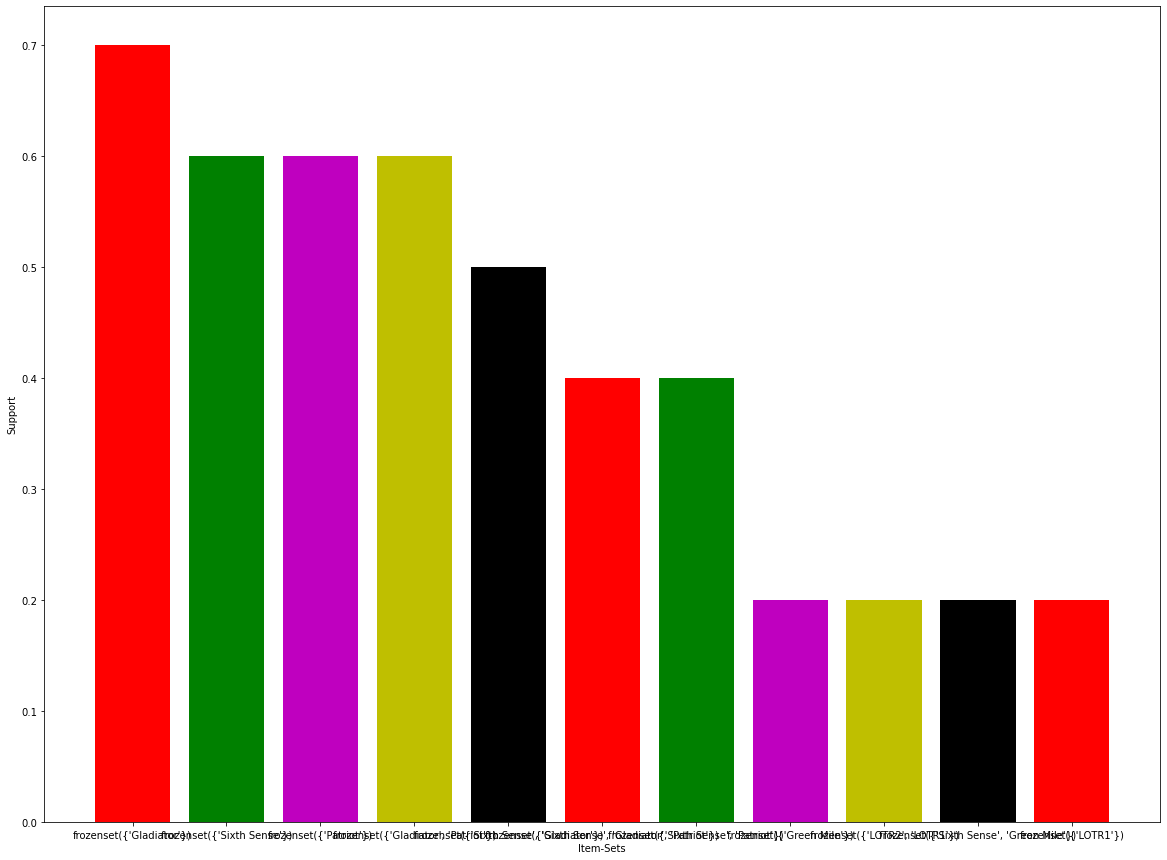

In [24]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
from collections import Counter
import matplotlib.pyplot as plt
import re

movies=pd.read_csv("C:\\Users\\kp\\Pictures\\Assignments\\Association Rule Mining[ARM]\\my_movies.csv")
movies=movies.drop(['V1','V2',"V3","V4",'V5'],axis=1)

frequent_itemsets = apriori(movies, min_support=0.005, max_len=4,use_colnames = True)
frequent_itemsets.sort_values('support',ascending = False,inplace=True)

plt.figure(figsize=(20,15))
plt.bar(x=range(0,11),height = frequent_itemsets.support[0:11],color='rgmyk')
plt.xticks(list(range(0,11)),frequent_itemsets.itemsets[0:11])
plt.xlabel('Item-Sets')
plt.ylabel('Support')

In [25]:
rules_mining = association_rules(frequent_itemsets, metric="lift", min_threshold=1)


def to_list(i):
    return (list(i))

redundant_list = rules_mining.antecedents.apply(to_list) + rules_mining.consequents.apply(to_list)


redundant_list = redundant_list.apply(sorted)
redundant_list=redundant_list.str.join(',')
rules_mining["Antecedents_Consequents"]=pd.Series(redundant_list)

rules_mining.drop_duplicates(subset ="Antecedents_Consequents", keep ='first', inplace = True)
rules_mining.sort_values('lift', ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,Antecedents_Consequents
194,"(Harry Potter1, LOTR2, LOTR1)",(Green Mile),0.1,0.2,0.1,1.0,5.0,0.08,inf,"Green Mile,Harry Potter1,LOTR1,LOTR2"
66,"(Sixth Sense, LOTR2)",(Green Mile),0.1,0.2,0.1,1.0,5.0,0.08,inf,"Green Mile,LOTR2,Sixth Sense"
160,"(Sixth Sense, Harry Potter1)",(LOTR1),0.1,0.2,0.1,1.0,5.0,0.08,inf,"Harry Potter1,LOTR1,Sixth Sense"
146,"(Sixth Sense, Gladiator, LOTR)",(Green Mile),0.1,0.2,0.1,1.0,5.0,0.08,inf,"Gladiator,Green Mile,LOTR,Sixth Sense"
132,"(Sixth Sense, LOTR2, LOTR1)",(Green Mile),0.1,0.2,0.1,1.0,5.0,0.08,inf,"Green Mile,LOTR1,LOTR2,Sixth Sense"
126,"(Harry Potter1, LOTR2)",(Green Mile),0.1,0.2,0.1,1.0,5.0,0.08,inf,"Green Mile,Harry Potter1,LOTR2"
188,(Harry Potter1),(Harry Potter2),0.2,0.1,0.1,0.5,5.0,0.08,1.8,"Harry Potter1,Harry Potter2"
102,"(Sixth Sense, Harry Potter1, LOTR2)",(Green Mile),0.1,0.2,0.1,1.0,5.0,0.08,inf,"Green Mile,Harry Potter1,LOTR2,Sixth Sense"
96,"(Harry Potter1, LOTR1)",(Green Mile),0.1,0.2,0.1,1.0,5.0,0.08,inf,"Green Mile,Harry Potter1,LOTR1"
90,"(Harry Potter1, LOTR2)",(LOTR1),0.1,0.2,0.1,1.0,5.0,0.08,inf,"Harry Potter1,LOTR1,LOTR2"
